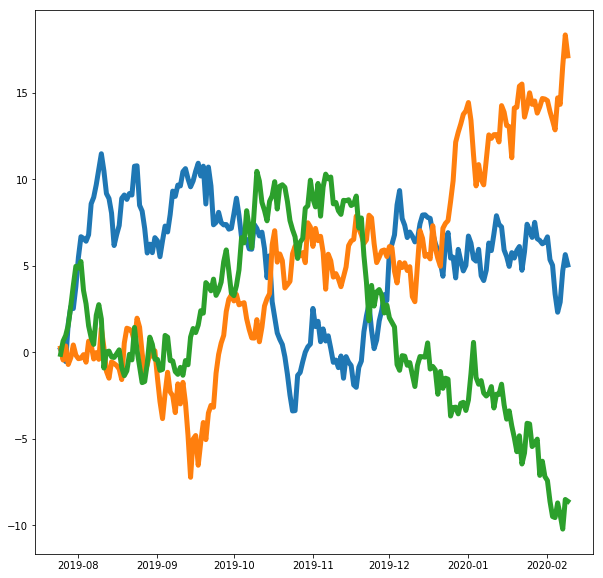

In [5]:
# Matplotlib 使用點 point 而非 pixel 為圖的尺寸測量單位，適合用於印刷出版。1 point = 1 / 72 英吋，但可以調整
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['figure.figsize'] = (10, 10)
plt.gcf().set_size_inches(10, 10)

x = pd.period_range(pd.datetime.now(), periods=200, freq='d')
x = x.to_timestamp().to_pydatetime()
# 產生三組，每組 200 個隨機常態分布元素
y = np.random.randn(200, 3).cumsum(0)
plt.plot(x, y)
plt.show()

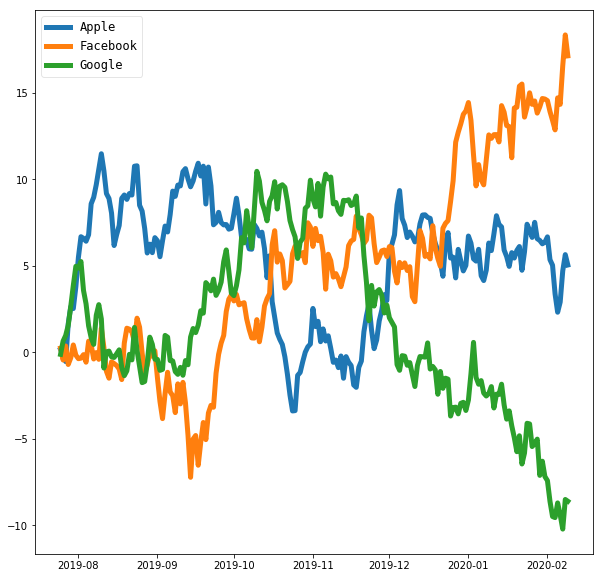

In [6]:
# 設定標籤
plots = plt.plot(x, y)
plt.legend(plots, ('Apple', 'Facebook', 'Google'), loc='best', framealpha=0.5, prop={'size': 'large', 'family': 'monospace'})
plt.show()

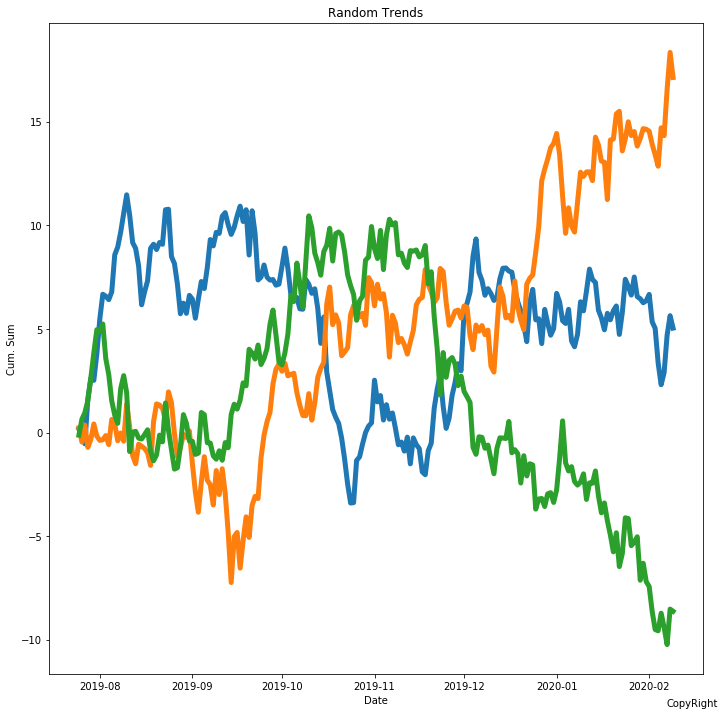

In [7]:
# 標題與軸標籤
plt.title('Random Trends')
plt.xlabel('Date')
plt.ylabel('Cum. Sum')
plt.figtext(0.995, 0.01, 'CopyRight', ha='right', va='bottom')
# 避免被圖表元素被蓋住
plt.tight_layout()
plt.plot(x, y)
plt.show()

In [8]:
# 儲存圖表
plt.savefig('plt.svg')

<Figure size 720x720 with 0 Axes>

In [9]:
# 使用物件導向方式控制圖表，透過控制 figure 和 axes 來操作。其中 figure 和全域 pyplot 部分屬性相同。例如： fig.text() 對應到 plt.fig_text()
fig = plt.figure(figsize=(8, 4), dpi=200, tight_layout=True, linewidth=1, edgecolor='r')

<Figure size 1600x800 with 0 Axes>

[]

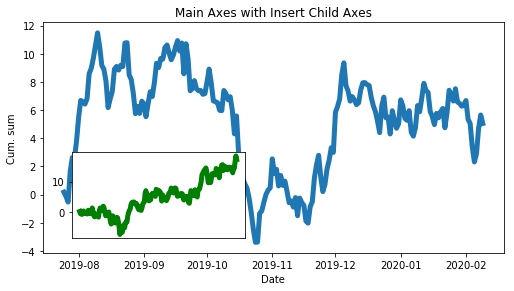

In [10]:
# 軸與子圖表
fig = plt.figure(figsize=(8, 4))

# 插入主要軸，可以透過 add_axes 控制軸在圖裡的位置。例如：[bottom*0.1, left*0.1, top*0.5, right*0.5]，fig.add_axes([0.1, 0.1, 0.5, 0.5])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title('Main Axes with Insert Child Axes')
ax.plot(x, y[:, 0])
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')

# 插入軸
ax = fig.add_axes([0.15, 0.15, 0.3, 0.3])
ax.plot(x, y[:, 1], color='g')
ax.set_xticks([])

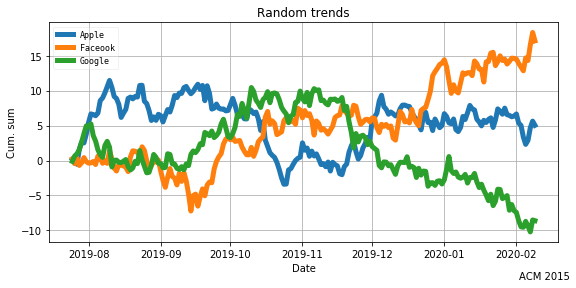

In [11]:
# 單一圖與軸繪製（subplots 不帶參數回傳擁有一軸 figure 物件，幾乎等同於 matplotlib 全域物件）
# matplotlib 內建版面編排系統相對好用。圖表大小不一可以使用 gridspec 模組
figure, ax = plt.subplots()
plots = ax.plot(x, y, label='')
figure.set_size_inches(8, 4)
ax.legend(plots, ('Apple', 'Faceook', 'Google'), loc='best', framealpha=0.25, prop={'size': 'small', 'family': 'monospace'})

ax.set_title('Random trends')
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')

ax.grid(True) # 使用格子
figure.text(0.995, 0.01, 'ACM 2015', ha='right', va='bottom')
figure.tight_layout()

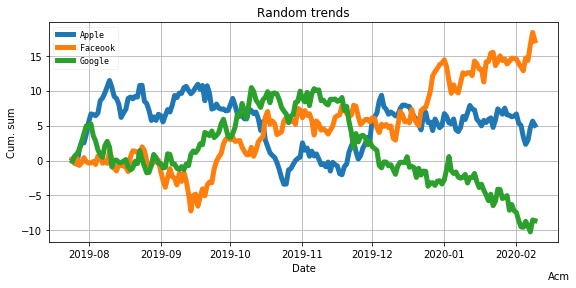

In [12]:
# 使用子圖表
figure, ax = plt.subplots()
plots = ax.plot(x, y, label='')
figure.set_size_inches(8, 4)
ax.legend(plots, ('Apple', 'Faceook', 'Google'), loc='best', framealpha=0.25, prop={'size': 'small', 'family': 'monospace'})
ax.set_title('Random trends')
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
ax.grid(True)

figure.text(0.995, 0.01, 'Acm', ha='right', va='bottom')
figure.tight_layout()

Text(0.5, 0, 'Date')

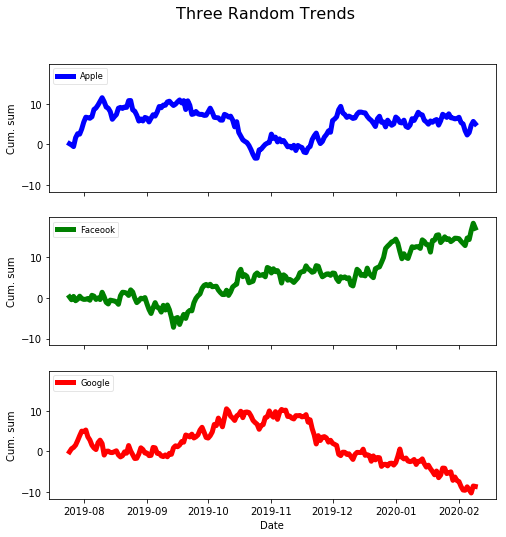

In [13]:
# 使用子圖表產生多個圖表
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 8))
labelled_data = zip(y.transpose(), ('Apple', 'Faceook', 'Google'), ('b', 'g', 'r'))
fig.suptitle('Three Random Trends', fontsize=16)

for i, ld in enumerate(labelled_data):
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})
axes[-1].set_xlabel('Date')

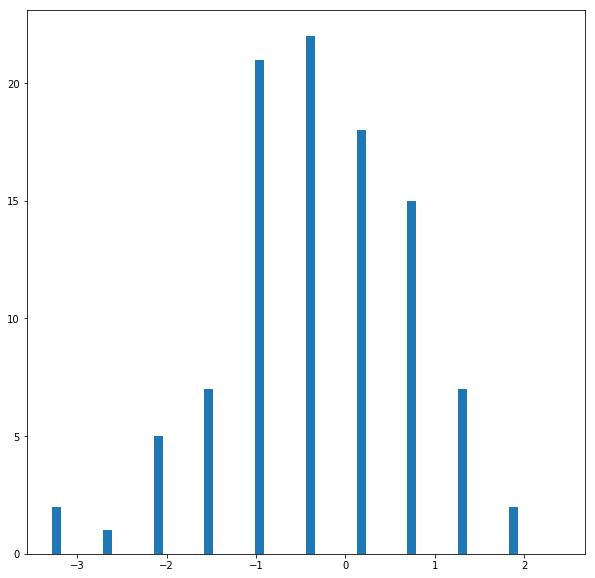

In [14]:
# 直方圖
normal_samples = np.random.normal(size=100) # 生成 100 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數
plt.hist(normal_samples, width=0.1)
plt.show()

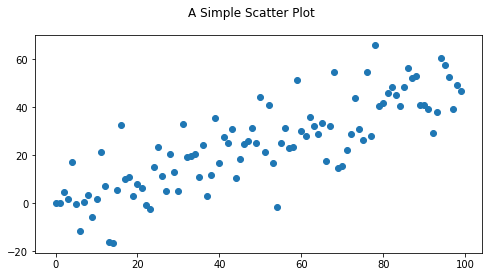

In [15]:
# 散佈圖
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x * gradient
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)

fig.suptitle('A Simple Scatter Plot')
plt.show()

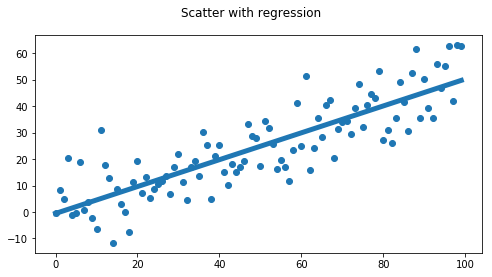

In [16]:
# 散佈圖 + 迴歸
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x * gradient

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y)

m, c = np.polyfit(x, y, 1) # 使用 Numpy 的 polyfit，參數 1 代表一維，算出 fit 直線斜率
ax.plot(x, m * x + c) # 使用 y = m * x + c 斜率和常數匯出直線
fig.suptitle('Scatter with regression')
plt.show()

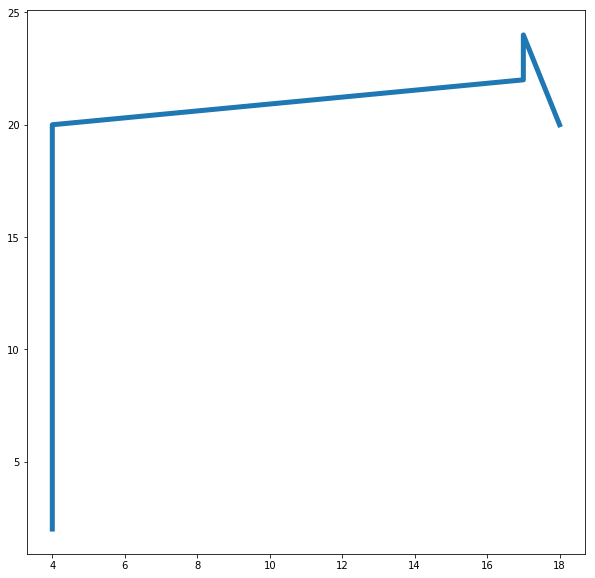

In [17]:
# 線圖
age = [4, 4, 17, 17, 18]
points = [2, 20, 22, 24, 20]

plt.plot(age, points)
plt.show()

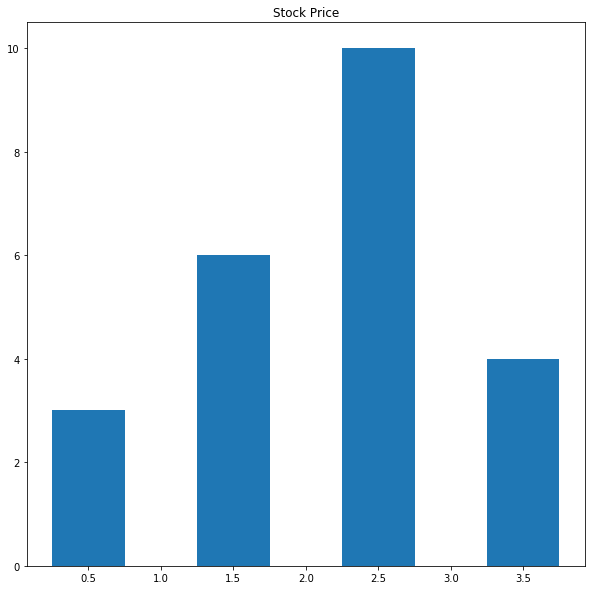

In [18]:
# 長條圖
labels = ['Physics', 'Chemistry', 'Literature', 'Peace']
foo_data = [3, 6, 10, 4]
bar_width = 0.5
xlocations = np.array(range(len(foo_data))) + bar_width

plt.bar(xlocations, foo_data, width=bar_width)

plt.title('Stock Price')
plt.show()

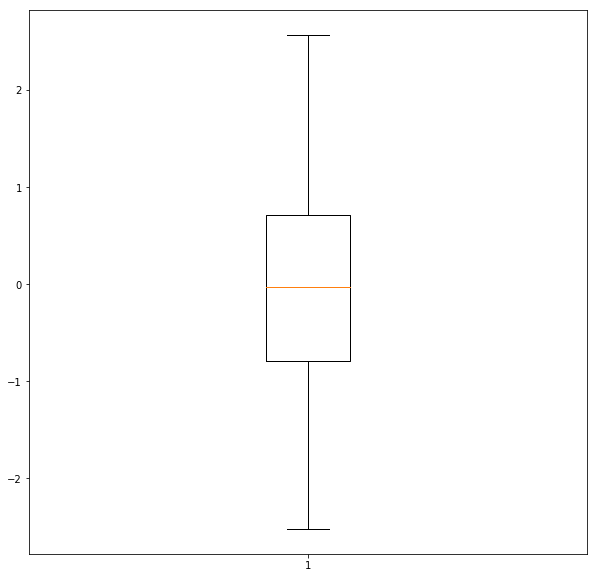

In [19]:
# 盒鬚圖
normal_examples = np.random.normal(size = 100) # 生成 100 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數

plt.boxplot(normal_examples)
plt.show()

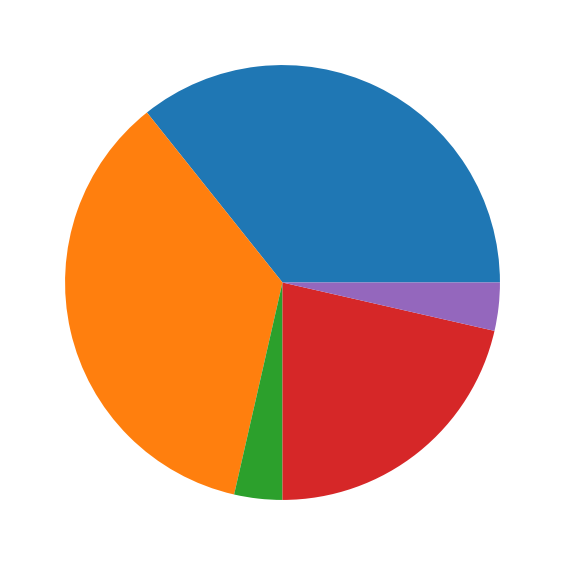

In [20]:
# 圓餅圖
data = np.random.randint(1, 11, 5) # 生成
x = np.arange(len(data))

plt.pie(data)

plt.show()

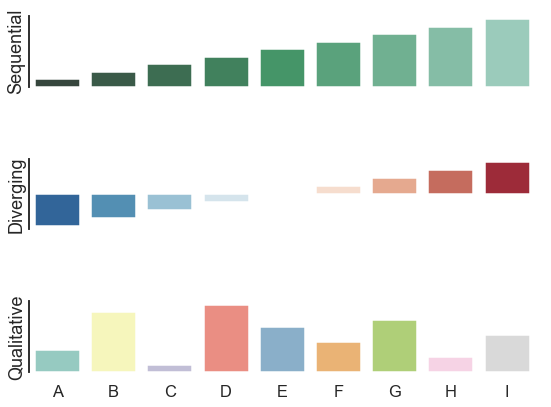

In [21]:
# Seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)


# 準備 matplotlib 圖表
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# 產生連續資料
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

# 調整成 diverging 資料
y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

# 隨機資料
y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# 秀出圖片
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)